In [13]:
import tensorflow as tf
from tensorflow import keras
import os

base_dir = '/kaggle/input/tajweed-data/datasets'

In [14]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset='training'
)
val_generator = datagen.flow_from_directory(  #validation generator
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 313 images belonging to 3 classes.
Found 76 images belonging to 3 classes.


In [15]:
print(train_generator.class_indices)
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labelsDisease.txt', 'w') as f:
    f.write(labels)

{'bila_ghunnah': 0, 'iqlab': 1, 'maal_ghunnah': 2}


In [16]:
class_names = train_generator.class_indices

print(class_names)

{'bila_ghunnah': 0, 'iqlab': 1, 'maal_ghunnah': 2}


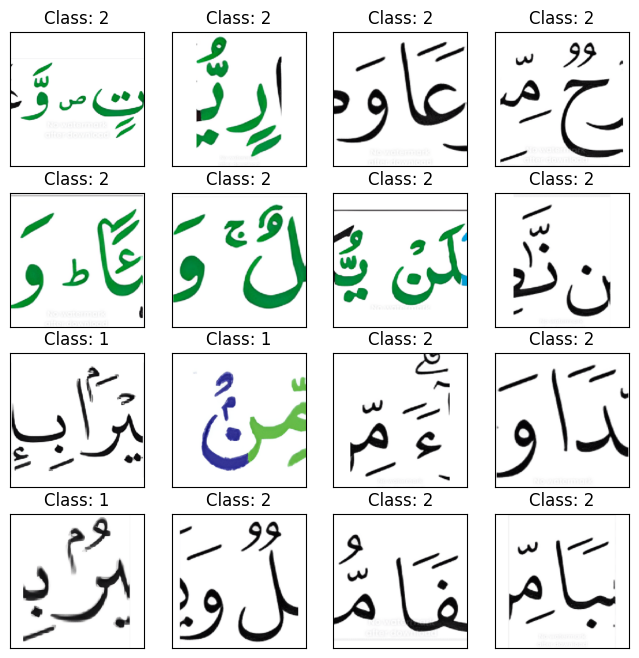

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and their corresponding labels
images, labels = train_generator.next()

# Parameters
#IMAGE_SIZE = 64 # Modify according to your dataset
#BATCH_SIZE = 32 # Modify according to your dataset
#GRID_SIZE = 4    # Modify according to your needs

# Reshape the image arrays to 2D arrays
images_np = np.array(images).reshape(64, 224, 224, 3)

# Create a figure with subplots
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

# Loop through the subplots and display the images and their class labels
for i, ax in enumerate(axes.flat):
    # Convert the 2D array to a numpy array
    image_np = images_np[i].reshape(224, 224, 3)

    # Display the image on the subplot
    ax.imshow(image_np)

    # Get the class label for the image
    label = np.argmax(labels[i])

    # Set the title of the subplot to the class label
    ax.set_title(f'Class: {label}')

    # Remove ticks from the subplot
    ax.set_xticks([])
    ax.set_yticks([])

# Display the plot
plt.show()

In [18]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

In [19]:
base_model.trainable=False
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32,3, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(3, #no.of classes
                        activation='softmax')
])

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 32)          368672    
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 global_average_pooling2d_1  (None, 32)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2626755 (10.02 MB)
Trainable params: 368

In [22]:
epochs = 100
history = model.fit(
    train_generator,
    epochs = epochs,
    validation_data=val_generator
)

Epoch 1/100


2024-02-02 16:01:12.948962: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


5/5 [==============================] - 7s 933ms/step - loss: 3.3219 - accuracy: 0.5272 - val_loss: 0.8271 - val_accuracy: 0.7500
Epoch 2/100
5/5 [==============================] - 2s 313ms/step - loss: 0.7291 - accuracy: 0.7700 - val_loss: 0.6645 - val_accuracy: 0.8158
Epoch 3/100
5/5 [==============================] - 1s 271ms/step - loss: 0.4893 - accuracy: 0.9010 - val_loss: 0.2731 - val_accuracy: 0.9211
Epoch 4/100
5/5 [==============================] - 2s 311ms/step - loss: 0.2609 - accuracy: 0.9169 - val_loss: 0.1883 - val_accuracy: 0.9342
Epoch 5/100
5/5 [==============================] - 2s 324ms/step - loss: 0.1525 - accuracy: 0.9521 - val_loss: 0.1238 - val_accuracy: 0.9605
Epoch 6/100
5/5 [==============================] - 2s 306ms/step - loss: 0.0899 - accuracy: 0.9808 - val_loss: 0.0671 - val_accuracy: 0.9737
Epoch 7/100
5/5 [==============================] - 2s 306ms/step - loss: 0.0686 - accuracy: 0.9904 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 8/100
5/5 [========

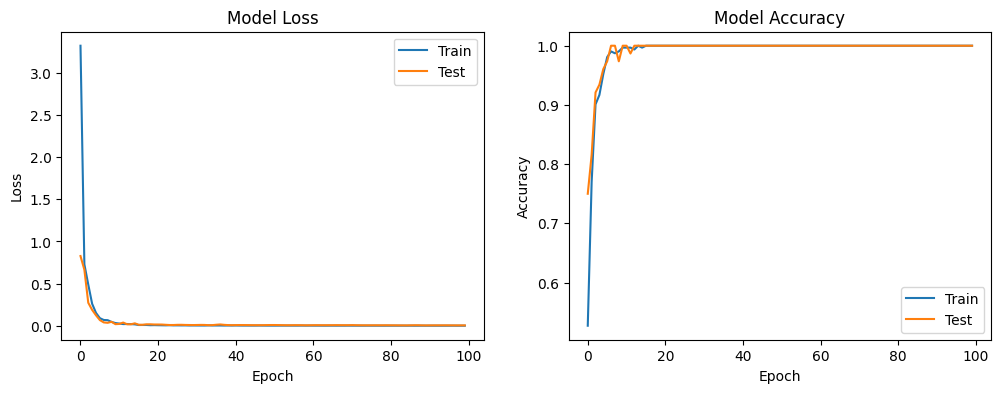

In [23]:


# Assuming 'history' is the output of the 'fit' function

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

In [27]:
import tensorflow as tf
model.save('tajweed.h5')

from tensorflow.keras.models import load_model

model = load_model('tajweed.h5')

#-----------not used----------#
#keras_file = 'predictDisease.h5'
#keras_file = os.path.join(os.getcwd(), 'predictDisease.h5')
#keras.models.save_model(model, keras_file)

# Load your Keras model (replace 'model.h5' with your model file)
#model = tf.keras.models.load_model(keras_file)
#-----------not used----------#


# Create a TFLite converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model to a TFLite model
tflite_model = converter.convert()

open('tajweed.tflite', 'wb').write(tflite_model)


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10342420